# Programming for Artificial Intelligence（Python）- Homework 67

**Student:** 林澈 

**Student ID:** 15220202205098

<span style="color: steelblue;">* Disclaimer: I have neither given nor received unauthorized assistance on this assignment.</span>

[<3](https://hackmd.io/@lazur77/Adaboost)

## 0. Necessary libraries

In [102]:
# conda install -y scikit-learn
# conda install -y matplotlib

In [103]:
from sklearn import datasets
import numpy as np
from functools import partial
from sklearn.tree import plot_tree

## 1.The Iris dataset


In [104]:
# Initialize the Iris dataset
iris = datasets.load_iris()
Xall = iris.data
conames = iris.feature_names
yall = iris.target
iris.target_names

# How many classes are there in the Iris data?
number_of_classes = len(np.unique(yall))
print(f'There are {number_of_classes} classes in the Iris data.')

# How many covariates does it have?
number_of_covariates = Xall.shape[1]
print(f'There are {number_of_covariates} covariates in the Iris data.')


There are 3 classes in the Iris data.
There are 4 covariates in the Iris data.


## 2. Preprocessing data

In [105]:
# take a subset for binary classification
index_want = yall < 2

# select wanted items and the corresponding features
X = Xall[index_want, 0:2]

# transform the binary classification from 0, 1 to -1, 1
y = (yall[index_want] - 0.5) * 2

# examine the shape of the features X and labels y
print(X.shape, y.shape)

conames[0:2]

(100, 2) (100,)


['sepal length (cm)', 'sepal width (cm)']

## 3. Visulization

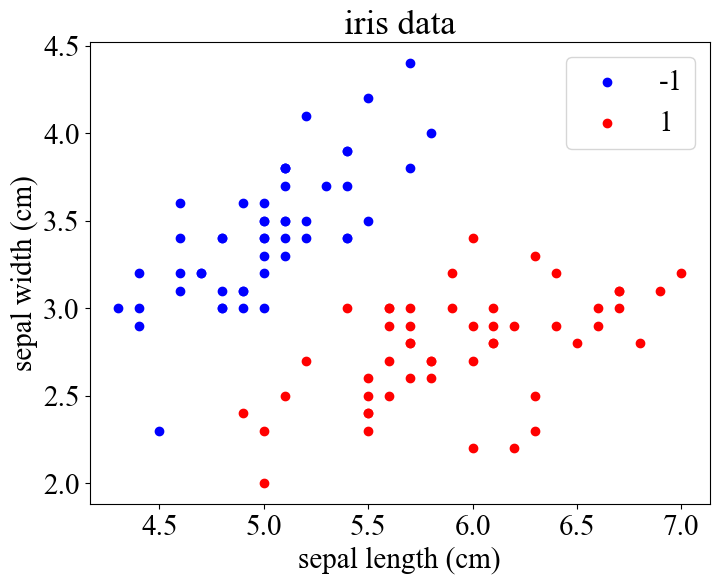

In [106]:
import plotiris
plotiris.plotiris(y, X)

## 4. Initialization


In [107]:
# initialization
def initAda(y):
    # number of samples
    n = len(y)
    w = np.ones(n) / n
    return w

w = initAda(y)
w

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01])

## 5. The first tree

Find the $t$-th tree $f_t(\boldsymbol{x})$ by
$$\min\sum_{y_i\neq f_t(x_i)}w_{t,i}$$

In [108]:
# find the stump

def stump(y, X, w):
    # Initialize the best feature, cut, and error
    best_covar = None
    best_cut = None
    best_error = np.inf  # set the best error to infinity since we want to minimize it
    yhat = None

    # Store cut points and their corresponding errors 
    all_cuts = []
    all_errors = []

    # Iterate over each feature in the dataset
    for covar in range(X.shape[1]):
        # Calculate cut points as midpoints between consecutive unique values
        x_uniq = np.array(sorted(np.unique(X[:, covar])))
        cuts = (x_uniq[:-1] + x_uniq[1:])/2

        # Iterate over each cut point
        for cut in cuts:
            ytemp = np.ones(len(y))
            # assign -1 to points less than the cut
            ytemp[X[:, covar] < cut] = -1
            # if -cut < 0:
            #     ???? = -1 
            # else:
            #     ???? = 1
            # Calculate the weighted error
            error = np.sum(w[(y != ytemp)])
            # print(f'cut = {cut}, error = {error}')
            all_cuts.append((covar, cut))
            all_errors.append(error)

           # Update the best error, cut, and feature if the current error is better
            if error < best_error:
                best_error = error
                best_cut = cut
                best_covar = covar
                yhat = ytemp
                
    # print(f"best covariate & correspoding value: {conames[best_covar]} at {best_cut}")
    return best_covar, best_cut, best_error, yhat, all_cuts, all_errors

best_covar, best_cut, best_error, yhat, all_cuts, all_errors = stump(y, X, w)
#  Debug output to display the best feature and cut
if best_covar is not None:
    print(f"Best split at Feature: {conames[best_covar]} at cut {best_cut}")

Best split at Feature: sepal length (cm) at cut 5.45


In [109]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 21

def plot_errors(all_cuts, all_errors, feature_names, output_path='plot.png'):
    plt.figure(figsize=(13, 7))

    # Find the minimum error and its index
    min_error_index = all_errors.index(min(all_errors))
    min_error_cut = all_cuts[min_error_index]

    colors = plt.cm.jet(np.linspace(0, 1, len(feature_names)))
    
    # A dictionary to track which features have been labeled
    labeled_features = {}

    # Plot all points, assigning colors by feature index
    for index, ((covar, cut), error) in enumerate(zip(all_cuts, all_errors)):
        label = f'Feature {feature_names[covar]}' if covar not in labeled_features else ""
        plt.scatter(cut, error, color=colors[covar], alpha=0.5, label=label)
        labeled_features[covar] = True  # Mark this feature as labeled

    # Highlight the minimum error
    plt.scatter(min_error_cut[1], all_errors[min_error_index], color='navy')
    plt.axvline(x=min_error_cut[1], color='navy', linestyle='--', alpha=0.5)
    plt.annotate(f'Minimum Error = {all_errors[min_error_index]:.3f} \nCutpoint in {feature_names[min_error_cut[0]]} = {min_error_cut[1]:.2f} ',
                 xy=(min_error_cut[1], all_errors[min_error_index]),
                 xytext=(min_error_cut[1] - 3.2, all_errors[min_error_index] + 0.17),
                 textcoords='data',
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='navy'),
                 bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.7))

    plt.xlabel('Cut value')
    plt.ylabel('Error', rotation=0, labelpad=40)
    plt.title('Error across different cuts for all features', pad=20)
    plt.legend(loc='upper right')
    plt.axis('tight')

    # Save the plot to a file
    plt.savefig(output_path)
    plt.close()  # Close the plot to free up memory

    print(f"Plot saved to {output_path}")

# Example usage:
plot_errors(all_cuts, all_errors, conames, 'error_plot.png')


Plot saved to error_plot.png


## 6. Compute the error

Compute error of the $t$-th tree as
$$E_t=\sum_{y_i\neq f_t(\boldsymbol{x}_i)}w_{t,i}$$

In [110]:
# compute error
def compute_error(y, yhat, w):
    return np.sum(w[y != yhat])

E = compute_error(y, yhat, w)
E

0.10999999999999999

## 7. Weight of a tree

Compute tree weight:
$$\alpha_t=\frac12\log\left(\frac{1-E_t}{E_t}\right)$$

In [111]:
# compute stump weight:
def getalpha(E):
    return 0.5 * np.log((1-E)/E)

a = getalpha(E)
a

1.0453705484668847

## 8. Update point weights

- Ensemble:
$$F_t(\boldsymbol{x})=F_{t-1}(\boldsymbol{x})+\alpha_tf_t(\boldsymbol{x})$$

- Update data weights:
$$w_{t+1,i}=w_{t,i}e^{-y_i\alpha_tf_t(\boldsymbol{x}_i)}$$

In [112]:
# update weights
def update_point_weight(w, y, a, yhat):
    return w * np.exp(-y * a * yhat)

w_1 = update_point_weight(w, y, a, yhat)
np.unique(w_1)

array([0.00351562, 0.02844452])

## 9. Putting ’em all together

In [113]:
# Initialize
ff = {}         # Dictionary to store function predictions
alpha = []      # List to store weights of each stump
T = 10           # Number of iterations
w = initAda(y)  # weights
weights = []    # List to store the weights of each point

# Prepare plotting
# fig, axs = plt.subplots(1, T, figsize=(5*T, 3))

for t in range(T):
  # Equation 1: Find the stump and get predictions
  ft = stump(y, X, w)           
  # best_covar, best_cut, best_error, yhat, all_cuts, all_errors = ft

  # Equation 2: Compute the error
  E = compute_error(y, yhat, w) 

  # Equation 3: Compute the alpha weight for the stump
  a = getalpha(E)               
  alpha.append(a)

  # Equation 4: Store the stump's predictions
  ff[t] = ft[3]                    

  # Equation 5: Update the weights
  weights.append(w)
  w = update_point_weight(w, y, a, yhat) 

yhat_native = np.sign(sum(alpha[t] * ff[t] for t in range(T)))
# yhat_native

## 10. Improve the tree

In [114]:
from sklearn.tree import DecisionTreeClassifier
def step1(y, X, w):
    G_m = DecisionTreeClassifier(max_depth = 2)     
    # Stump: Two terminal-node classification tree
    G_m.fit(X, y, sample_weight = w)
    y_pred = G_m.predict(X)
    return y_pred, G_m

yhat_improve, _ = step1(y, X, w)
yhat_improve

array([-1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

## 11. Using others’ wheel

In [115]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
clf.fit(X, y)
yhat_sklearn = clf.predict(X)
compare = yhat_improve * yhat_sklearn
compare

array([ 1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

## 12. Plot a tree (Optional)

[Text(0.5, 0.8333333333333334, 'x[1] <= 3.05\ngini = 0.498\nsamples = 100\nvalue = [0.326, 0.37]'),
 Text(0.25, 0.5, 'x[0] <= 4.85\ngini = 0.091\nsamples = 50\nvalue = [0.018, 0.352]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 6\nvalue = [0.013, 0.0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.024\nsamples = 44\nvalue = [0.004, 0.352]'),
 Text(0.75, 0.5, 'x[0] <= 5.85\ngini = 0.102\nsamples = 50\nvalue = [0.309, 0.018]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 42\nvalue = [0.309, 0.0]'),
 Text(0.875, 0.16666666666666666, 'gini = -0.0\nsamples = 8\nvalue = [0.0, 0.018]')]

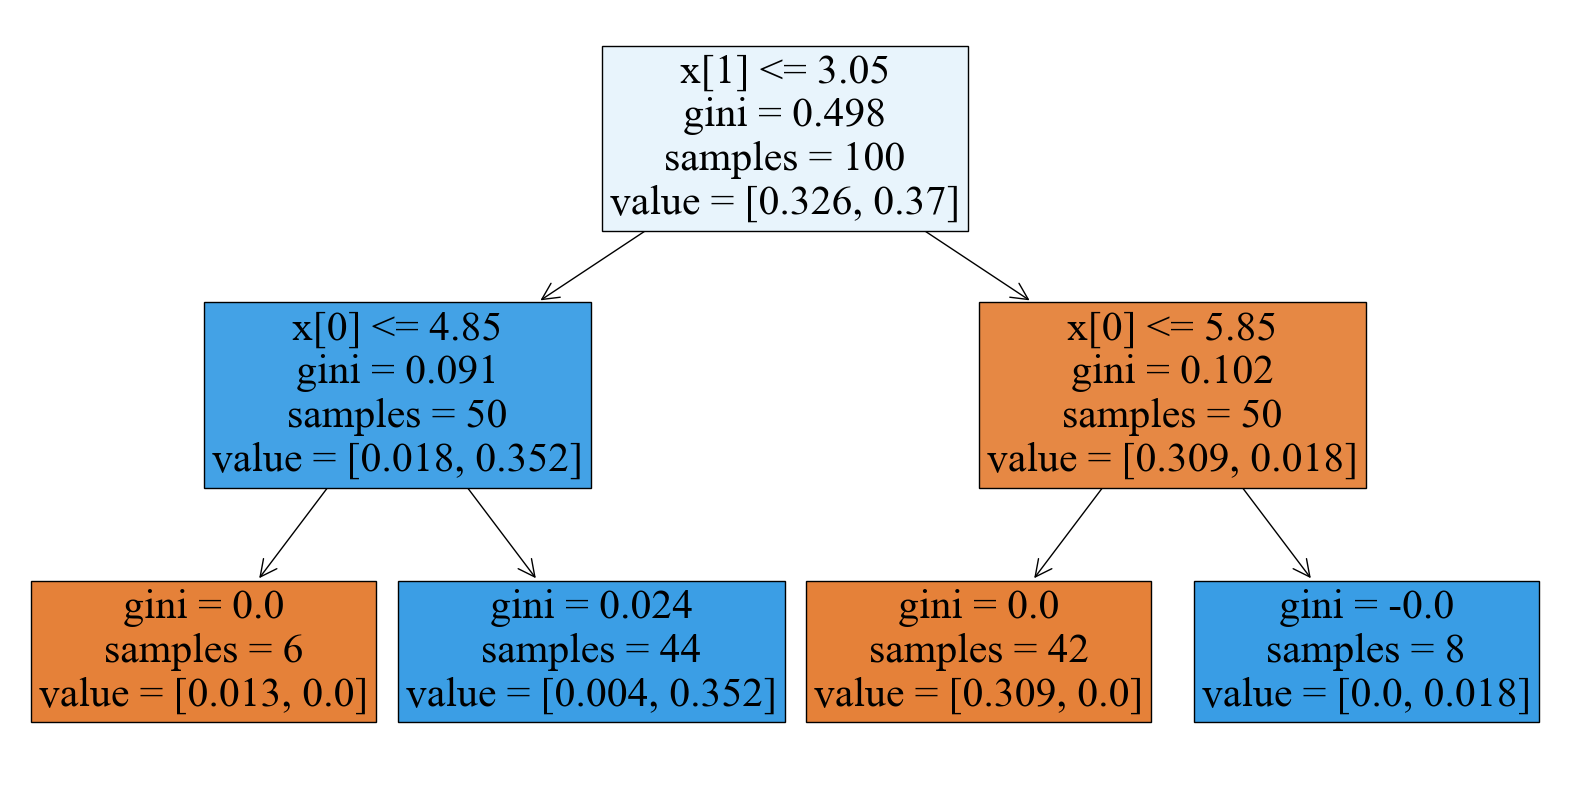

In [116]:
# plot a tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(_, filled=True)

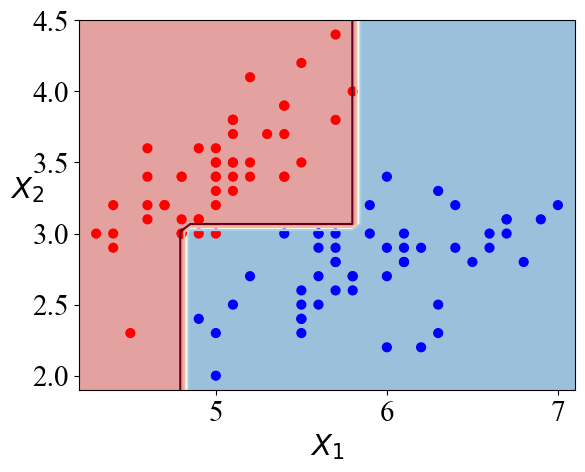

In [117]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(classifier, X, y, N = 10, scatter_weights = np.ones(len(y)) , ax = None ):
    '''Utility function to plot decision boundary and scatter plot of data'''
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid( np.linspace(x_min, x_max, N), np.linspace(y_min, y_max, N))

    
    #Check what methods are available
    if hasattr(classifier, "decision_function"):
        zz = np.array( [classifier.decision_function(np.array([xi,yi]).reshape(1,-1)) for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
    elif hasattr(classifier, "predict_proba"):
        zz = np.array( [classifier.predict_proba(np.array([xi,yi]).reshape(1,-1))[:,1] for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
    else :
        zz = np.array( [classifier(np.array([xi,yi]).reshape(1,-1)) for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
            
    # reshape result and plot
    Z = zz.reshape(xx.shape)
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    #Get current axis and plot
    if ax is None:
        ax = plt.gca()
    ax.contourf(xx, yy, Z, 2, cmap='RdBu', alpha=.5)
    ax.contour(xx, yy, Z,  2, cmap='RdBu')
    ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright, s = scatter_weights * 40)
    ax.set_xlabel('$X_1$')
    ax.set_ylabel('$X_2$', rotation = 0 )

plot_decision_boundary(_, X,y, N = 50)#, weights)